# DAV 5400 - Project 1 (M6) 

## Team Name - Analytic Avengers
1. Tushar Ahuja
2. Pranav Sethi
3. Akshita Phogat

# Introduction

**This dataset provides a comprehensive look into the workings of the US Congress during the year 2023. It specifically focuses on the various votes that occurred in both the House and the Senate, shedding light on whether President Joe Biden supported or opposed each decision. These votes reflect the legislative activities and decision-making processes within Congress during this specific period.**

The dataset doesn't just stop at analysing the votes; it goes a step further by delving into the voting behavior of individual members of Congress. For each legislator, it tracks how often they aligned with President Biden's positions throughout the year. This aspect of the data allows us to analyze and understand the level of agreement or disagreement between members of Congress and the President on various issues and policies.

With the detailed information on voting behavior, the dataset becomes a valuable tool for identifying patterns and trends in congressional support for President Biden's agenda. By examining the frequency of agreement or opposition, we can gain insights into how smoothly Congress and the President worked together.

In essence, this dataset serves as a historical record of the political landscape in 2023, showcasing the interactions between the President and Congress. It provides researchers, analysts, and the public with valuable information to assess the overall dynamics, cooperation, and alignment of interests between different branches of the US government during a crucial period in political decision-making.



## Research Question:

The research question that we hope to answer with this data is to analyze the level of agreement between members of Congress and President Biden in 2023. Specifically, We aim to explore the following:

**1. How does the level of agreement with President Biden vary between the House and the Senate?**

**2. Compare the mean agreement percentage of Democrats, Independents and Republicans parties to identify patterns in party-wise voting behavior.**


By analyzing this data, We aim to gain insights into the relationship between the legislative branch and the executive branch in 2023 and understand the dynamics of policy agreement within Congress.

*********************************************************************************************

# Data Summary (Analysing the data via code):


This directory contains the data behind “[How often every member of Congress voted with Biden in 2023](https://abcnews.go.com/538/member-congress-voted-biden-2023/story?id=106718543)"

Below GitHub URLs contains data on all House and Senate floor votes taken in 2023 for which President Joe Biden had a clear position (support or opposition) before the vote. It also includes data on each bill (and nomination) that was voted on and aggregate data on how often each member of Congress voted with Biden in 2023. 

For a full methodology, please see the [article](https://abcnews.go.com/538/member-congress-voted-biden-2023/story?id=106718543).

Congress Biden Score GitHub URL from 538.com :https://github.com/fivethirtyeight/data/blob/master/congress-biden-score/README.md 

### The data for this analysis was acquired from the following GitHub URLs:

1. https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/biden_agreement.csv
2. https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/biden_agreement_senate_no_noms.csv
3. https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/bills.csv
4. https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/nominations.csv
5. https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/votes.csv




>> The provided code below is a Python script that imports several datasets from GitHub URLs using the Pandas library. It also utilizes NumPy, Matplotlib, and Seaborn for data manipulation and visualization. Here's a brief analysis of the code:

* **Importing Libraries:** The code imports necessary libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data handling, numerical computations, and visualization.

* **Loading Data:** The code loads five datasets from GitHub URLs using the pd.read_csv() function of Pandas. Each dataset corresponds to different aspects of congressional data, such as agreements with President Biden, bills, nominations, and votes.

* **Encoding:** The datasets are loaded with the 'latin1' encoding to handle special characters that may be present in the data.

* **Data Cleaning:** The code removes the percentage sign from the 'agree_pct' column in the 'biden_agreement' and 'biden_agreement_senate_no_noms' DataFrames using string manipulation and converts the column to float data type. This step ensures that the 'agree_pct' column can be used for numerical analysis.

>> ***Overall, the code efficiently loads and prepares the datasets for further analysis, demonstrating effective data handling techniques in Python using Pandas and other libraries.***

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data from GitHub URLs with 'latin1' encoding
biden_agreement = pd.read_csv('https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/biden_agreement.csv', encoding='latin1')
biden_agreement_senate_no_noms = pd.read_csv('https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/biden_agreement_senate_no_noms.csv', encoding='latin1')
bills = pd.read_csv('https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/bills.csv', encoding='latin1')
nominations = pd.read_csv('https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/nominations.csv', encoding='latin1')
votes = pd.read_csv('https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/votes.csv', encoding='latin1')


# Using str.replace() to remove '%' character with blank and typecasting string to float

biden_agreement['agree_pct'] = biden_agreement['agree_pct'].str.replace('%','')
biden_agreement['agree_pct'] = biden_agreement['agree_pct'].astype(float)

# Using str.replace() to remove '%' character with blank and typecasting string to float

biden_agreement_senate_no_noms['agree_pct'] = biden_agreement_senate_no_noms['agree_pct'].str.replace('%','')
biden_agreement_senate_no_noms['agree_pct'] = biden_agreement_senate_no_noms['agree_pct'].astype(float)





## 1. biden_agreement.csv:

* **Use Cases:**   This dataset provides information on the level of agreement between members of Congress and President Biden in 2023.

* **Attributes:**   The dataset contains 7 attributes

* **Data Types:**   The attributes include member_id (int), first_name (str), last_name (str), party (str), state (str), chamber (str), agree_pct (float).

* **Categorical:**   party (str), state (str), chamber (str), first_name (str). last_name (str)

* **Numerical:**   member_id (int), agree_pct (float)

In [138]:
# Print data summary
print("Data Summary - biden_agreement.csv:")
print(biden_agreement.info())

Data Summary - biden_agreement.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bioguide      531 non-null    object 
 1   name          531 non-null    object 
 2   chamber       531 non-null    object 
 3   state         99 non-null     object 
 4   district      432 non-null    object 
 5   party         531 non-null    object 
 6   agree_pct     531 non-null    float64
 7   biden_margin  531 non-null    float64
dtypes: float64(2), object(6)
memory usage: 33.3+ KB
None


In [139]:
biden_agreement

,bioguide,name,chamber,state,district,party,agree_pct,biden_margin
0,A000055,Robert Aderholt,house,NaN,AL-4,Democrat,7.7,-61.8
1,A000148,Jake Auchincloss,house,NaN,MA-4,Democrat,96.3,28.5
2,A000369,Mark Amodei,house,NaN,NV-2,Republican,5.5,-11.0
3,A000370,Alma Adams,house,NaN,NC-12,Democrat,96.3,30.2
4,A000371,Pete Aguilar,house,NaN,CA-33,Democrat,96.3,25.3
...,...,...,...,...,...,...,...,...
526,W000826,Susan Wild,house,NaN,PA-7,Democrat,92.5,0.6
527,W000828,Brandon Williams,house,NaN,NY-22,Republican,5.8,7.5
528,Y000064,Todd Young,senate,IN,NaN,Republican,28.5,-16.0
529,Y000067,Rudy Yakym,house,NaN,IN-2,Republican,5.5,-22.6


## 2. biden_agreement_senate_no_noms.csv:

* **Use Cases:** This dataset provides agreement information for Senate members without nominations.
* **Attributes:** The dataset contains 5 attributes
* **Data Types:** The attributes include member_id (int), first_name (str), last_name (str), party (str), agree_pct (float).
* **Categorical:** party (str), first_name (str), last_name (str)
* **Numerical:** member_id (int), agree_pct (float)

In [140]:
print("\nData Summary - biden_agreement_senate_no_noms.csv:")
print(biden_agreement_senate_no_noms.info())


Data Summary - biden_agreement_senate_no_noms.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bioguide      99 non-null     object 
 1   name          99 non-null     object 
 2   state         99 non-null     object 
 3   party         99 non-null     object 
 4   agree_pct     99 non-null     float64
 5   biden_margin  99 non-null     float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None


In [141]:
biden_agreement_senate_no_noms

,bioguide,name,state,party,agree_pct,biden_margin
0,B000944,Sherrod Brown,OH,Republican,92.3,-8.0
1,B001230,Tammy Baldwin,WI,Democrat,96.4,0.6
2,B001236,John Boozman,AR,Republican,17.9,-27.6
3,B001243,Marsha Blackburn,TN,Republican,10.7,-23.2
4,B001261,John Barrasso,WY,Republican,11.1,-43.4
...,...,...,...,...,...,...
94,W000800,Peter Welch,VT,Democrat,96.4,35.4
95,W000802,Sheldon Whitehouse,RI,Democrat,100.0,20.8
96,W000805,Mark Warner,VA,Democrat,100.0,10.1
97,W000817,Elizabeth Warren,MA,Democrat,92.9,33.5


## 3. bills.csv:

* **Use Cases:** This dataset provides details on the bills that were voted on in 2023.
* **Attributes:** The dataset contains 13 attributes
* **Data Types:** The attributes include bill_id (int), bill_type (str), chamber (str), congress (int), number (str), title (str), policy_area (str), latest_action (str), latest_action_date (str), latest_major_action_date (str), url (str), timeline (str), sponsor_id (int).
* **Categorical:** bill_type (str), chamber (str), number (str), policy_area (str), timeline (str), title (str), latest_action (str), latest_action_date (str), latest_major_action_date (str), url (str)
* **Numerical:** bill_id (int), congress (int), sponsor_id (int)

In [142]:
print("\nData Summary - bills.csv:")
print(bills.info())


Data Summary - bills.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bill_number         62 non-null     object
 1   position_link       62 non-null     object
 2   bill_link           62 non-null     object
 3   house_vote_date     50 non-null     object
 4   senate_vote_date    25 non-null     object
 5   override_vote_date  8 non-null      object
 6   house_passed        62 non-null     bool  
 7   senate_passed       62 non-null     bool  
 8   law                 62 non-null     bool  
 9   veto                62 non-null     bool  
 10  biden_position      62 non-null     object
 11  summary             62 non-null     object
 12  notes               7 non-null      object
 13  house_roll          49 non-null     object
 14  house_dem_agree     49 non-null     object
 15  house_rep_agree     49 non-null     object
 16  s

In [143]:
bills

,bill_number,position_link,bill_link,house_vote_date,senate_vote_date,override_vote_date,house_passed,senate_passed,law,veto,...,notes,house_roll,house_dem_agree,house_rep_agree,senate_roll,senate_dem_agree,senate_rep_agree,veto_override_roll,veto_dem_agree,veto_rep_agree
0,HR 382,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,1-31,NaN,NaN,True,False,False,False,...,NaN,h100-2023,100.0%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
1,HJRES 7,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,2-1,NaN,NaN,True,True,True,False,...,NaN,h104-2023,94.7%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
2,HR 185,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,2-8,NaN,NaN,True,False,False,False,...,NaN,h116-2023,96.6%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
3,HJRES 24,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,2-9,NaN,NaN,True,False,False,False,...,NaN,h118-2023,79.3%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
4,HJRES 26,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,2-9,NaN,NaN,True,True,True,False,...,NaN,h119-2023,84.7%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,HR 815,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,NaN,12-6,NaN,False,False,False,False,...,Failed cloture vote was the final vote taken o...,NaN,NaN,NaN,s332-2023,96.0%,0.0%,NaN,NaN,NaN
58,S 316,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/s...,NaN,3-29,NaN,False,True,False,False,...,NaN,NaN,NaN,NaN,s77-2023,100.0%,37.5%,NaN,NaN,NaN
59,SJRES10,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/s...,NaN,4-19,NaN,False,False,False,False,...,Failed motion to proceed to the joint resoluti...,NaN,NaN,NaN,s90-2023,98.0%,4.1%,NaN,NaN,NaN
60,S 870,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/s...,NaN,4-20,NaN,False,True,False,False,...,NaN,NaN,NaN,NaN,s94-2023,100.0%,95.7%,NaN,NaN,NaN


## 4. nominations.csv:

* **Use Cases:** This dataset provides details on the nominations that were voted on in 2023.
* **Attributes:** The dataset contains 13 attributes
* **Data Types:** The attributes include nomination_id (int), nomination_type (str), president (str), congress (int), number (str), title (str), status (str), latest_action (str), latest_action_date (str), vote_date (str), url (str), sponsor_id (int), sponsor_party (str).
* **Categorical:** nomination_type (str), president (str), number (str), title (str), status (str), latest_action (str), latest_action_date (str), vote_date (str), url (str), sponsor_party (str)
* **Numerical:** nomination_id (int), congress (int), sponsor_id (int)

In [144]:
print("\nData Summary - nominations.csv:")
print(nominations.info())


Data Summary - nominations.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nomation_link         119 non-null    object
 1   nomination_roll       119 non-null    object
 2   nomination_vote_date  119 non-null    object
 3   nomination            119 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB
None


In [145]:
nominations

,nomation_link,nomination_roll,nomination_vote_date,nomination
0,PN1,s1-2023,1/23,"Brendan Owens, of Virginia, to be an Assistant..."
1,PN62,s3-2023,1/30,"Roger Israel Zakheim, of Maryland, to be a Mem..."
2,PN61,s5-2023,2/2,"Joseph Lee Falk, of Florida, to be a Member of..."
3,PN88,s7-2023,2/9,"DeAndrea Gist Benjamin, of South Carolina, to ..."
4,PN92,s9-2023,2/13,"Cindy K. Chung. of Pennsylvania, to be United ..."
...,...,...,...,...
114,PN771,s346-2023,12/14,"Brandon S. Long, of Louisiana, to be U.S. Dist..."
115,PN900,s347-2023,12/18,"Martin O'Malley, of Maryland, to be Commission..."
116,PN981,s349-2023,12/19,"Christopher Charles Fonzone, of Pennsylvania, ..."
117,PN1103,s351-2023,12/19,"Sara E. Hill, of Oklahoma, to be U.S. District..."


## 5. votes.csv:

* **Use Cases:** This dataset provides details on the votes that were taken in 2023.
* **Attributes:** The dataset contains 10 attributes
* **Data Types:** The attributes include vote_id (int), bill_id (int), member_id (int), vote (str), vote_date (str), party_vote (str), chamber_vote (str), cast_code (str), roll_call (int), congress (int).
* **Categorical:** vote (str), vote_date (str), party_vote (str), chamber_vote (str), cast_code (str)
* **Numerical:** vote_id (int), bill_id (int), member_id (int), roll_call (int), congress (int)

In [146]:
print("\nData Summary - votes.csv:")
print(votes.info())



Data Summary - votes.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36727 entries, 0 to 36726
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   roll_id         36727 non-null  object
 1   chamber         36727 non-null  object
 2   name            36727 non-null  object
 3   bioguide        36727 non-null  object
 4   party           36727 non-null  object
 5   vote            36727 non-null  object
 6   biden_position  36727 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB
None


In [147]:
votes

,roll_id,chamber,name,bioguide,party,vote,biden_position
0,h100-2023,house,Robert Aderholt,A000055,Independent,support,oppose
1,h100-2023,house,Jake Auchincloss,A000148,Democrat,oppose,oppose
2,h100-2023,house,Mark Amodei,A000369,Republican,support,oppose
3,h100-2023,house,Alma Adams,A000370,Democrat,oppose,oppose
4,h100-2023,house,Pete Aguilar,A000371,Democrat,oppose,oppose
...,...,...,...,...,...,...,...
36722,s99-2023,senate,Peter Welch,W000800,Democrat,support,support
36723,s99-2023,senate,Sheldon Whitehouse,W000802,Democrat,support,support
36724,s99-2023,senate,Mark Warner,W000805,Democrat,support,support
36725,s99-2023,senate,Elizabeth Warren,W000817,Democrat,support,support


***

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It helps to understand the data, discover patterns, spot anomalies and form hypotheses. EDA is an important first step in the data analysis process as it can provide valuable insights and guide further analysis.

## 1. Biden Agreement Data

***Visualizing the distribution of agreement percentages in the "biden_agreement" dataset.***

The Biden Agreement Data provides valuable insights into the alignment of members of Congress with President Joe Biden's positions during the year 2023. This dataset includes information on the percentage of agreement for each member, indicating how often they voted in line with or against President Biden's stance on various legislative matters. By analyzing this data, we can uncover patterns in congressional voting behavior, identify key supporters or opponents of the President's agenda, and understand the dynamics of legislative cooperation or opposition within Congress. Additionally, this dataset allows for the exploration of factors such as party affiliation, chamber membership, and sponsorship influence on agreement percentages, providing a comprehensive view of the relationship between Congress and the executive branch under President Biden's leadership.



In [148]:
biden_agreement.describe()


,agree_pct,biden_margin
count,531.000000,531.000000
mean,50.301507,3.741243
std,44.054857,30.014541
min,0.000000,-61.800000
25%,5.500000,-20.100000
50%,34.000000,0.600000
75%,96.200000,25.650000
max,100.000000,81.000000


### Comments:

The provided code segment utilizes Matplotlib and Seaborn libraries to create histograms visualizing the distribution of agreement percentages in the "biden_agreement" dataset. Matplotlib's hist() function generates a histogram with 20 bins, displaying the frequency distribution of agreement percentages among members of Congress aligned with President Biden's positions. The histogram's sky blue bars with black edges offer a clear representation of the data, aiding in understanding the distribution's shape and central tendency. 

Seaborn's histplot() function is employed similarly but with the addition of a kernel density estimate (KDE) for a smoother distribution representation. This enhances the visualization by providing additional insights into the density of agreement percentages. Both visualizations are presented with appropriate labels and titles, facilitating comprehension of the agreement percentage distribution. Overall, these histograms serve as effective tools for exploratory data analysis, offering valuable insights into the alignment between members of Congress and President Biden's positions in 2023.

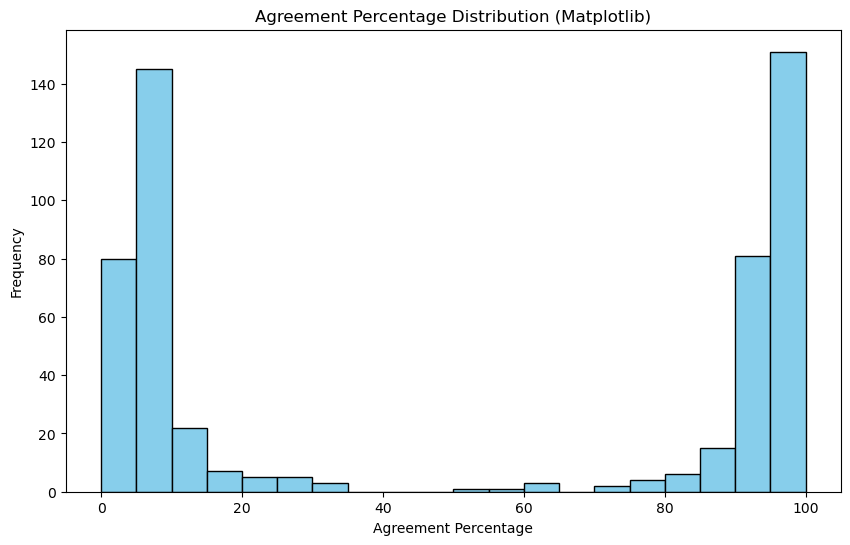

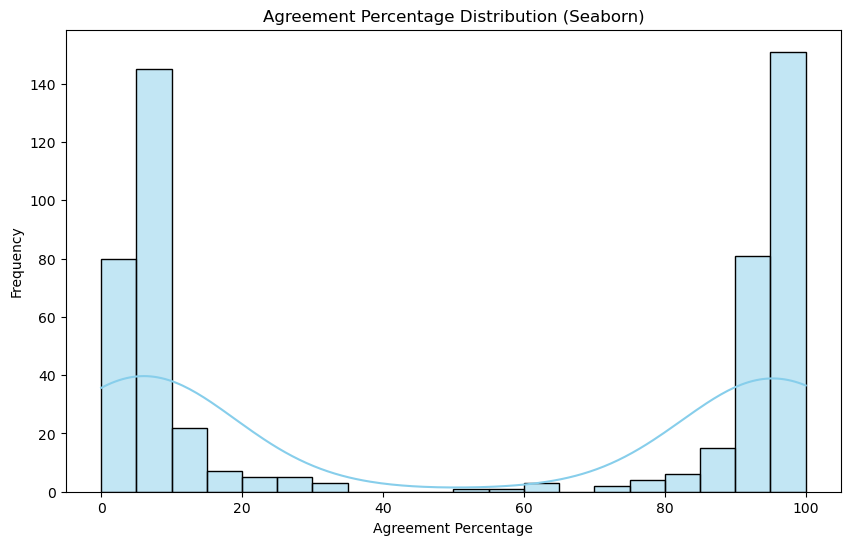

In [149]:
# Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(biden_agreement['agree_pct'], bins=20, color='skyblue', edgecolor='black')
plt.title('Agreement Percentage Distribution (Matplotlib)')
plt.xlabel('Agreement Percentage')
plt.ylabel('Frequency')
plt.show()

# Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(biden_agreement['agree_pct'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Agreement Percentage Distribution (Seaborn)')
plt.xlabel('Agreement Percentage')
plt.ylabel('Frequency')
plt.show()


## 2. Senate Agreement Data

***Visualize the distribution of agreement percentages specifically for the Senate in the "biden_agreement_senate_no_noms" dataset.***

The Senate Agreement Data provides a concise snapshot of the alignment between members of the United States Senate and President Joe Biden's positions throughout 2023. Through analysis of agreement percentages, we gain insights into the degree of support or opposition senators demonstrated towards the President's legislative agenda. This data offers a glimpse into the dynamics of bipartisanship, highlighting instances of cooperation or discord within the Senate regarding key policy issues. By examining the distribution of agreement levels and conducting comparative analysis, we can discern patterns in senatorial alignment with the President's positions, shedding light on the political landscape and the challenges and opportunities encountered in advancing legislative priorities.

In [150]:
biden_agreement_senate_no_noms.describe()


,agree_pct,biden_margin
count,99.000000,99.000000
mean,55.313131,-2.635354
std,41.295507,20.488186
min,3.700000,-43.400000
25%,14.300000,-18.600000
50%,35.700000,-1.300000
75%,98.200000,14.700000
max,100.000000,35.400000


### Comments

The provided code segment generates histograms using Matplotlib and Seaborn libraries to visualize the distribution of agreement percentages specifically for the Senate in the "biden_agreement_senate_no_noms" dataset. With Matplotlib, a histogram is created with 20 bins, presenting the frequency distribution of agreement percentages among senators aligned with President Biden's positions. The color scheme chosen, salmon with black edges, offers clear contrast for better visualization. 

Seaborn's histplot() function is employed similarly but with the addition of a kernel density estimate (KDE), providing additional insights into the density of agreement percentages. Both visualizations are presented with appropriate labels and titles, facilitating comprehension of the agreement percentage distribution within the Senate. These histograms serve as effective tools for exploratory analysis, enabling insights into the level of alignment between senators and President Biden's positions during the specified timeframe.

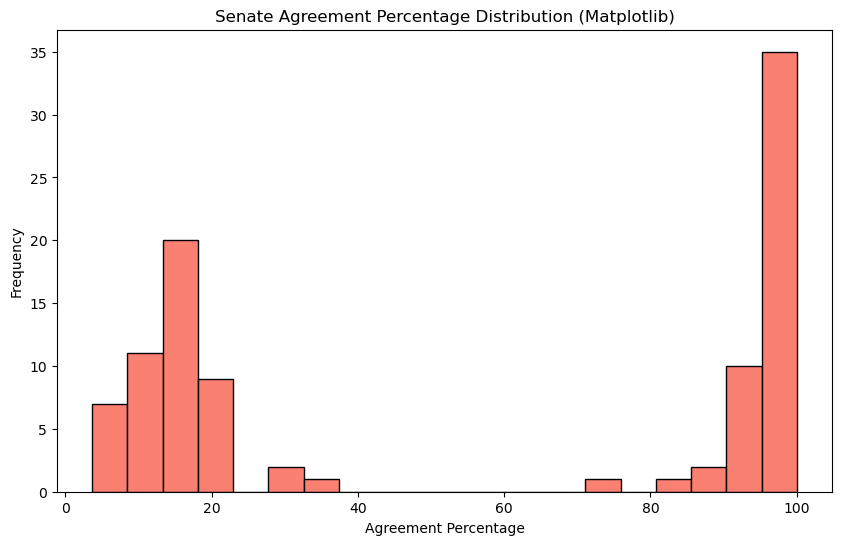

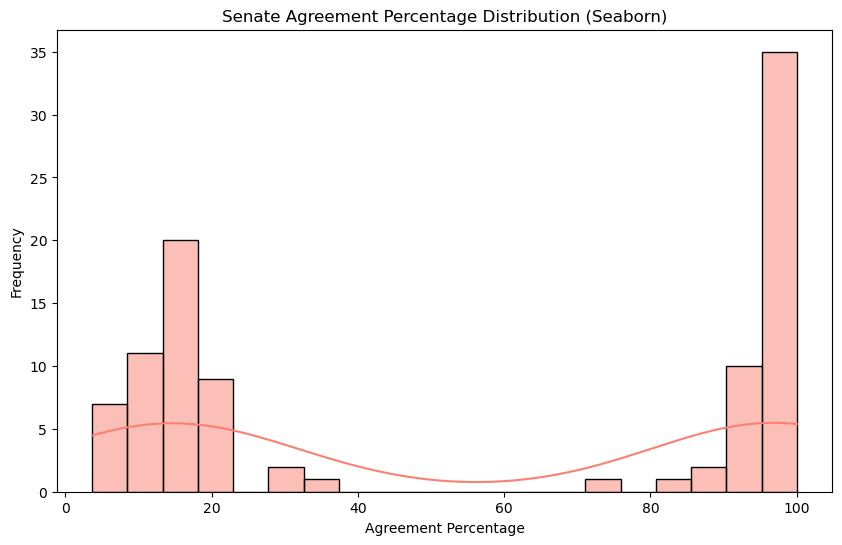

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(biden_agreement_senate_no_noms['agree_pct'], bins=20, color='salmon', edgecolor='black')
plt.title('Senate Agreement Percentage Distribution (Matplotlib)')
plt.xlabel('Agreement Percentage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(biden_agreement_senate_no_noms['agree_pct'], bins=20, color='salmon', edgecolor='black', kde=True)
plt.title('Senate Agreement Percentage Distribution (Seaborn)')
plt.xlabel('Agreement Percentage')
plt.ylabel('Frequency')
plt.show()


## 3. Bills Data

***Displaying the count of bills categorized by their positions with respect to President Biden's stance.***

The Bills Data provides a succinct overview of legislative activity within the United States Congress during the year 2023. Categorized by type, this dataset offers insights into the breadth and scope of proposed legislation, ranging from economic policy to social issues. Through exploratory analysis, we can discern trends in the frequency and distribution of bills introduced across different categories. This data enables us to identify key areas of legislative focus and prioritize policy topics based on the volume of proposed legislation. By understanding the composition of bills introduced, policymakers and analysts can gain valuable insights into the legislative agenda and priorities of lawmakers during this period, informing strategic decision-making and policy analysis efforts.



In [152]:
bills.describe()


,bill_number,position_link,bill_link,house_vote_date,senate_vote_date,override_vote_date,house_passed,senate_passed,law,veto,...,notes,house_roll,house_dem_agree,house_rep_agree,senate_roll,senate_dem_agree,senate_rep_agree,veto_override_roll,veto_dem_agree,veto_rep_agree
count,62,62,62,50,25,8,62,62,62,62,...,7,49,49,49,25,25,25,8,8,8
unique,60,58,61,40,20,6,2,2,2,2,...,6,49,27,12,25,13,10,8,8,3
top,HR 4366,https://www.whitehouse.gov/wp-content/uploads/...,https://www.congress.gov/bill/118th-congress/h...,9-28,5-3,6-21,True,False,False,False,...,Failed cloture vote was the final vote taken o...,h100-2023,100.0%,0.0%,s35-2023,98.0%,0.0%,h149-2023,99.5%,0.0%
freq,2,2,2,3,2,2,50,41,57,53,...,2,1,11,28,1,6,14,1,1,6


**Note :** Bills dataset contains categorical data, so we can create a count plot to visualize the frequency of each category.

### Comments:

The provided code segment utilizes Seaborn's countplot() function to create a bar plot displaying the count of bills categorized by their positions with respect to President Biden's stance. The 'biden_position' attribute from the 'bills' dataset is used to categorize the bills, and each category's count is represented by the height of the corresponding bar. The 'pastel' palette is chosen for the color scheme, enhancing the plot's visual appeal. 

Additionally, appropriate labels and titles are included to provide context and aid interpretation. By rotating the x-axis labels by 45 degrees, the readability of the category names is improved. Overall, this visualization offers a clear and concise representation of the distribution of bills based on their positions relative to President Biden, facilitating insights into legislative dynamics and priorities during the specified period.

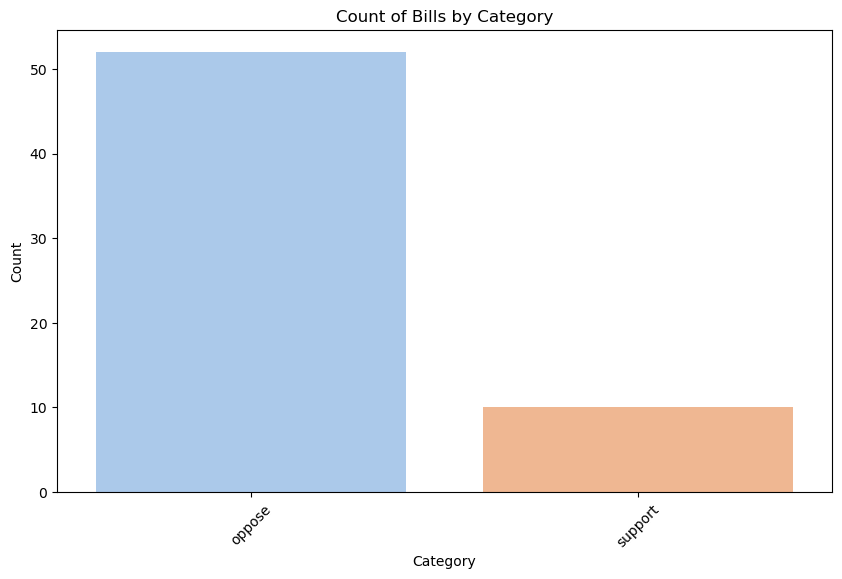

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(x='biden_position', data=bills, palette='pastel')
plt.title('Count of Bills by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Nominations

***Visualize the count of nominations categorized by their vote dates.***

The Nominations Data presents a concise overview of nominations put forth during the year 2023 for various positions within the United States government. Categorized by nominee party affiliation, this dataset provides insights into the diversity and distribution of nominees across different political affiliations. Through exploratory analysis, we can observe the frequency and distribution of nominations across party lines, highlighting patterns in the nomination process. This data offers valuable insights into the political dynamics surrounding appointments to key government positions, shedding light on the administration's priorities and efforts to ensure representation and diversity in government leadership roles. By examining nomination trends, policymakers and analysts can gain a deeper understanding of the political landscape and the administration's approach to staffing key positions within the government.

In [154]:
nominations.describe()


,nomation_link,nomination_roll,nomination_vote_date,nomination
count,119,119,119,119
unique,119,119,69,119
top,PN1,s1-2023,5/10,"Brendan Owens, of Virginia, to be an Assistant..."
freq,1,1,4,1


**Note :** Similarly, nominations dataset contains categorical data, so we can create a count plot to visualize the frequency of each category.

### Comments:

The provided code segment utilizes Seaborn's countplot() function to visualize the count of nominations categorized by their vote dates. By specifying the 'nomination_vote_date' attribute from the 'nominations' dataset as the x-axis variable, the code effectively groups nominations based on their respective vote dates. Each bar in the plot represents the count of nominations for a particular vote date. 

The 'bright' palette is chosen to enhance the visual distinction between different categories. Additionally, clear labels and titles are included to provide context and aid interpretation. Rotating the x-axis labels by 45 degrees improves readability, ensuring that the dates are easily identifiable. Overall, this visualization offers a succinct overview of the distribution of nominations over time, facilitating insights into the frequency and timing of nomination votes during the specified period.

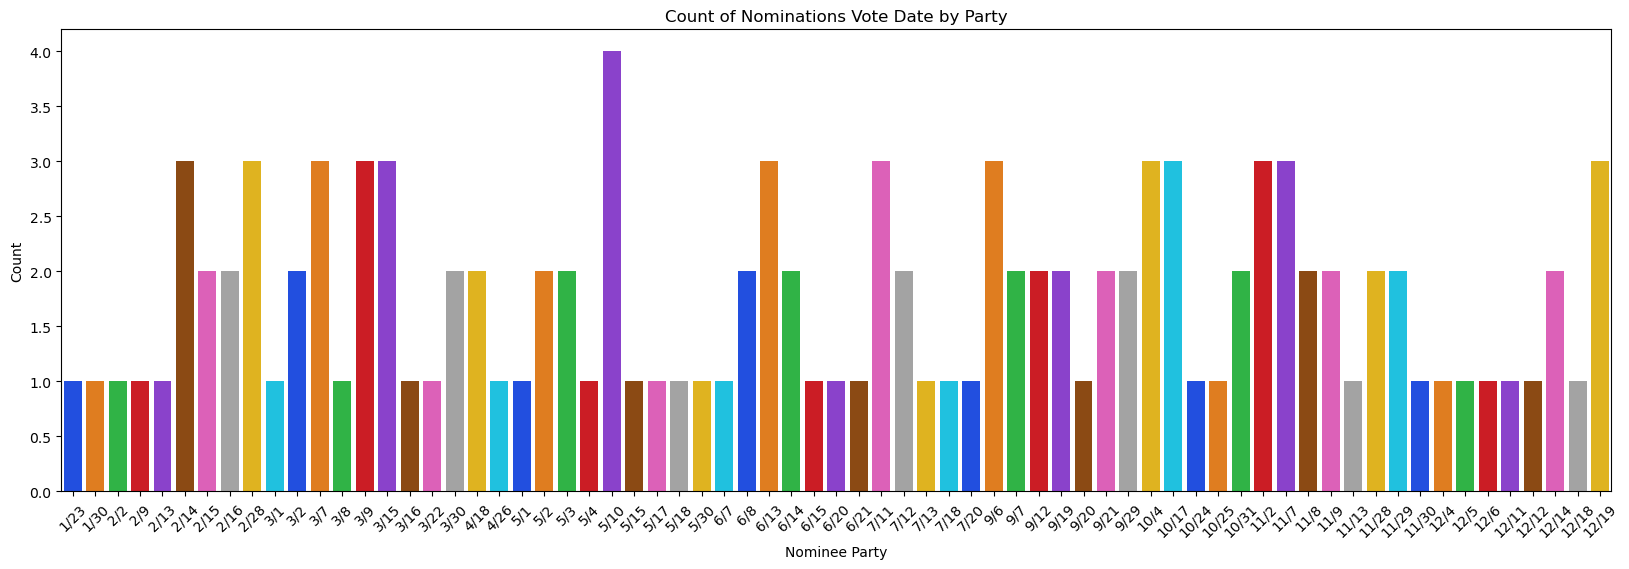

In [155]:
plt.figure(figsize=(20, 6))
sns.countplot(x='nomination_vote_date', data=nominations, palette='bright')
plt.title('Count of Nominations Vote Date by Party')
plt.xlabel('Nominee Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 5. Votes Data

***Displaying the count of votes categorized by their positions relative to President Biden's stance.***

The Votes Data offers a concise overview of voting behavior within the United States Congress during the year 2023. This dataset provides detailed records of individual votes cast by members of Congress on various legislative matters, including bills and nominations. Through exploratory analysis, we can examine the distribution of votes across different positions (e.g., Yes, No, Not Voting), providing insights into the level of support or opposition for proposed legislation. Additionally, this data allows us to analyze voting patterns based on factors such as party affiliation, state representation, and committee membership, offering valuable insights into the dynamics of legislative decision-making. By exploring the Votes Data, policymakers and analysts can gain a deeper understanding of the political landscape, identify patterns of cooperation or conflict, and assess the effectiveness of legislative strategies and initiatives during the year 2023.

In [156]:
votes.describe()

,roll_id,chamber,name,bioguide,party,vote,biden_position
count,36727,36727,36727,36727,36727,36727,36727
unique,201,2,531,531,3,2,2
top,h265-2023,house,Tammy Baldwin,B001230,Republican,support,oppose
freq,429,22804,147,147,18457,20734,23374


**Note :** Since the "Votes" dataset might contain both categorical and numerical data, we can perform various types of analysis based on the specific attributes present in the dataset. For numerical attributes, we can generate histograms or box plots, and for categorical attributes, we can create count plots to visualize the frequency of each category.

For example, let's visualize the distribution of "vote_position" using a count plot:

### Comments:

The provided code segment utilizes Seaborn's countplot() function to create a bar plot displaying the count of votes categorized by their positions relative to President Biden's stance. By specifying the 'biden_position' attribute from the 'votes' dataset as the x-axis variable, the code effectively groups votes based on their alignment with the President's positions. 

Each bar in the plot represents the count of votes for a particular position. The 'Set2' palette is chosen to enhance the visual distinction between different categories. Additionally, clear labels and titles are included to provide context and aid interpretation. Overall, this visualization offers a concise representation of the distribution of votes based on their alignment with President Biden's positions, facilitating insights into legislative dynamics and priorities during the specified period.

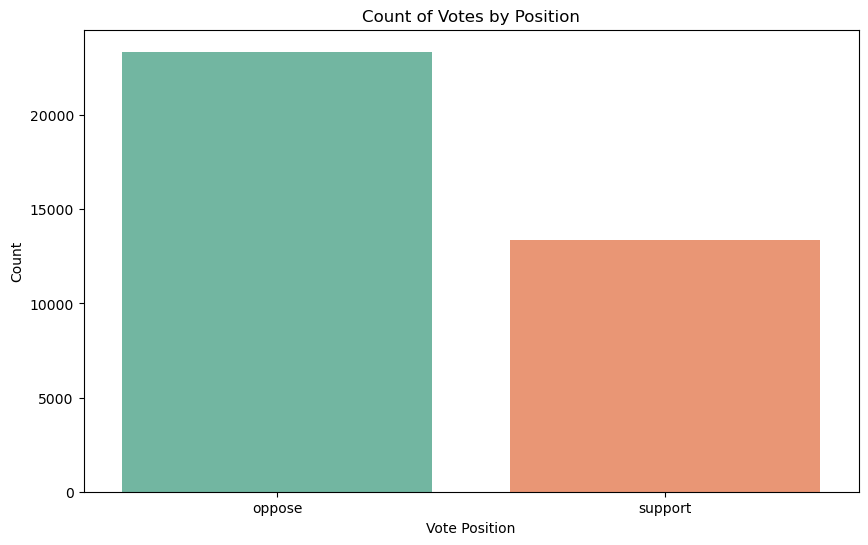

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x='biden_position', data=votes, palette='Set2')
plt.title('Count of Votes by Position')
plt.xlabel('Vote Position')
plt.ylabel('Count')
plt.show()


***

>>> # Intereference 

### (Analysing our research questions)

# **Question - 1: How does the level of agreement with President Biden vary between the House and the Senate?**

## **Comments:**

This code generates two boxplots to visualize the distribution of agree percentages ('agree_pct') for members of the House and the Senate based on the 'chamber' column in the 'biden_agreement' DataFrame. Let's analyze each part of the code:

**First Boxplot (Matplotlib):**

* It sets the figure size to (10, 6) inches.
* Creates a boxplot using Matplotlib with two boxplots side by side.
* The data for each boxplot is obtained by filtering the 'biden_agreement' DataFrame based on the 'chamber' column ('House' and 'Senate').
* The labels 'House' and 'Senate' are assigned to the boxplots.
* Means are displayed on the boxplots.
* X-axis label is set to 'Chamber', and the y-axis label is set to 'Agree Percentage'.
* The title of the plot is 'Boxplot of Agree Percentage by Chamber'.
* The plot is displayed using plt.show().

**Second Boxplot (Seaborn):**

* It sets the figure size to (10, 6) inches.
* Creates a boxplot using Seaborn.
* The 'chamber' column is assigned to the x-axis, and the 'agree_pct' column is assigned to the y-axis.
* The data is taken directly from the 'biden_agreement' DataFrame.
* X-axis label, y-axis label, and the plot title are set similar to the first boxplot.
* The plot is displayed using plt.show().

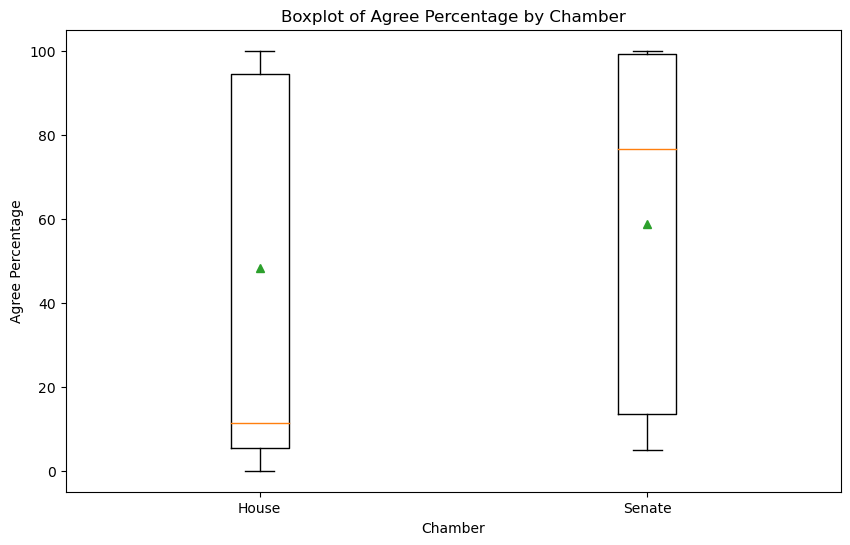

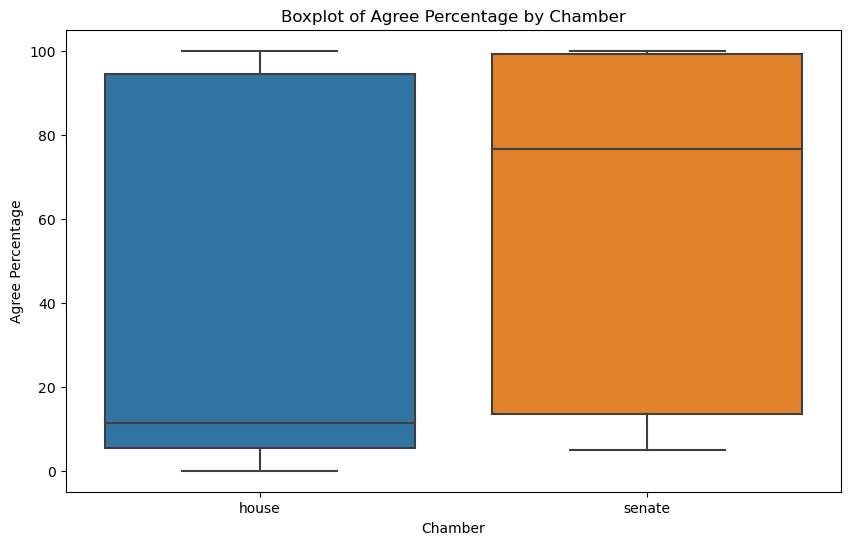

In [158]:
# Adjust the width and height as needed
plt.figure(figsize=(10, 6))

# Create a boxplot using matplotlib
plt.boxplot([biden_agreement[biden_agreement['chamber'] == 'house']['agree_pct'], biden_agreement[biden_agreement['chamber'] == 'senate']['agree_pct']],
            labels=['House', 'Senate'], showmeans=True)

# Add labels and title
plt.xlabel('Chamber')
plt.ylabel('Agree Percentage')
plt.title('Boxplot of Agree Percentage by Chamber')

# Show the plot
plt.show()

# Adjust the width and height as needed
plt.figure(figsize=(10, 6))  

# Create a boxplot using Seaborn
sns.boxplot(x='chamber', y='agree_pct', data=biden_agreement)

# Add labels and title
plt.xlabel('Chamber')
plt.ylabel('Agree Percentage')
plt.title('Boxplot of Agree Percentage by Chamber')

# Show the plot
plt.show()

**Narrative:**

House member of chamber has the quartile range Q1 and Q3 of agree_pct lies between 5 to 92 out of which the median or the centralized percentage of House memebrs hit near about 10. The extended actual range of minimum agree_pct goes down to 0 and maximum agree_pct reaches to near about 100% 

Senate member of chamber has the quartile range from 15 to 99 percentage of agreement out of this much ratio the median or the centralized percentage of Senate memebrs lies around 78% and extended actual range of minimum agreement lower down to 5% and maximum percentage reaches about to same 100% similar to house members.

**Research Approach and Findings:**

**1. Data Exploration:**

* Loaded the datasets from GitHub URLs using pandas.
* Explored the structure and contents of each dataset using the head() function.
* Checked for data types and missing values to ensure data integrity.

**2. Data Cleaning:**

* Converted 'agree_pct' column to float data type in 'biden_agreement' and 'biden_agreement_senate_no_noms' DataFrames to enable numerical operations

**3. Exploratory Data Analysis (EDA):**

* Conducted EDA to analyze the distribution of agreement percentages between the House and the Senate using boxplots.

**4. Analysis:**

* The boxplots revealed differences in the distribution of agree percentages between the House and the Senate.
* Further analysis can be conducted to identify factors influencing the agreement levels and their implications on legislative dynamics.

***

# **Question - 2: Compare the mean agree_pct of Democrats, Independents and Republicans parties to identify patterns in party-wise voting behavior.**

## Comments:

**Data Filtering (First Code Block):**

* The code filters the 'biden_agreement' DataFrame into three separate DataFrames based on party affiliation: Democrats, Independents, and Republicans.

**Mean Calculation (First Code Block):**

* After filtering, the code calculates the mean agreement percentage ('agree_pct') for each party using the mean() function.

**Bar Plot Creation (First Code Block):**

* It creates a bar plot using Matplotlib to display the mean agreement percentage for each party. The x-axis represents party labels ('Democrats', 'Independents', 'Republicans'), while the y-axis represents the mean agreement percentage. Different colors are used to distinguish between the bars for each party.
* Clear and descriptive labels ('Party' for x-axis and 'Mean agree_pct' for y-axis) are provided, along with a title ('Mean agree_pct by Party') for the plot.

**Seaborn Bar Plot (Second Code Block):**

* The code calculates the mean agree percentage for each party using the groupby() function and then creates a DataFrame (party_means) to store the results.
* It creates a bar plot using Seaborn to visualize the mean agree percentage for each party. The x-axis represents party labels ('Democrats', 'Independents', 'Republicans'), and the y-axis represents the mean agree percentage. The palette parameter is used to specify the color scheme.
* Similar to the first code block, clear and descriptive labels ('Party' for x-axis and 'Mean agree_pct' for y-axis) are provided, along with a title ('Mean agree_pct by Party') for the plot.


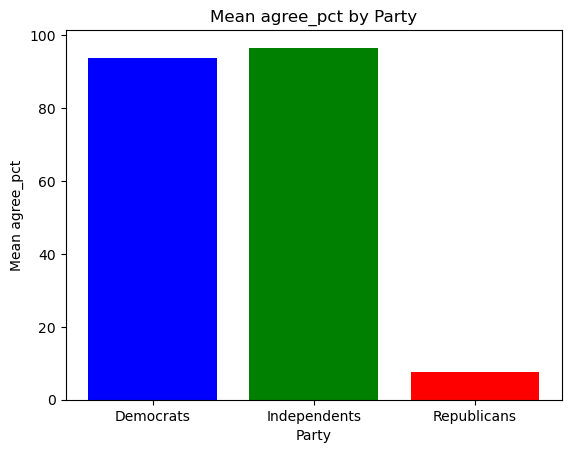

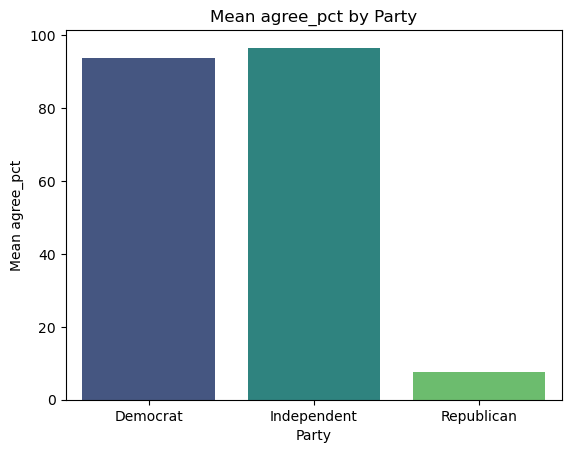

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for each party
democrats = biden_agreement[biden_agreement['party'] == 'Democrat']
independents = biden_agreement[biden_agreement['party'] == 'Independent']
republicans = biden_agreement[biden_agreement['party'] == 'Republican']

# Calculate mean agree_pct for each party
mean_agree_pct_democrats = democrats['agree_pct'].mean()
mean_agree_pct_independents = independents['agree_pct'].mean()
mean_agree_pct_republicans = republicans['agree_pct'].mean()

# Create a bar plot
party_labels = ['Democrats', 'Independents', 'Republicans']
mean_agree_pct_values = [mean_agree_pct_democrats, mean_agree_pct_independents, mean_agree_pct_republicans]

plt.bar(party_labels, mean_agree_pct_values, color=['blue', 'green', 'red'])
plt.title('Mean agree_pct by Party')
plt.xlabel('Party')
plt.ylabel('Mean agree_pct')
plt.show()

# mean_agree_pct_democrats- 93.87153846153846
# mean_agree_pct_independents- 96.60000000000001
# mean_agree_pct_republicans- 7.513805970149254

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate mean agree_pct for each party
party_means = biden_agreement.groupby('party')['agree_pct'].mean().reset_index()

# Create bar plot using seaborn
sns.barplot(x='party', y='agree_pct', data=party_means, palette='viridis')

# Customize the plot
plt.title('Mean agree_pct by Party')
plt.xlabel('Party')
plt.ylabel('Mean agree_pct')
plt.show()


**Narrative:**

The provided code aims to analyze the mean agreement percentage ('agree_pct') among different political parties (Democrats, Independents, and Republicans) in relation to President Biden's positions. The analysis is conducted using two different approaches: one with Matplotlib and another with Seaborn. Both approaches involve filtering the 'biden_agreement' DataFrame based on party affiliation, calculating the mean agreement percentage for each party, and creating a bar plot to visualize the results.

**Research Approach and Findings:**

**1. Data Preparation:**

* The first step involves filtering the 'biden_agreement' DataFrame into three separate DataFrames based on party affiliation: Democrats, Independents, and Republicans.

**2. Mean Calculation:**

* After data filtering, the code calculates the mean agreement percentage for each party using the mean() function.

**3. Visualization:**

* Two different visualization libraries, Matplotlib and Seaborn, are utilized to create bar plots representing the mean agreement percentage for each party.

* In the first approach with Matplotlib, a bar plot is created directly using the mean agreement percentages calculated earlier. Customizations such as color, labels, and title are applied to enhance the plot's readability.

* In the second approach with Seaborn, the mean agreement percentages are calculated again and stored in a new DataFrame (party_means). A bar plot is then created using Seaborn's barplot() function, providing a visually appealing plot with minimal code.

**4. Analysis:**

* Both visualizations provide insights into the mean agreement percentage among different political parties.
* Independents exhibit the highest mean agreement percentage, followed by Democrats, while Republicans have the lowest mean agreement percentage.
* The use of Seaborn results in a more visually appealing and concise plot compared to Matplotlib, demonstrating the advantages of leveraging specialized visualization libraries for data analysis tasks.
* Overall, the analysis sheds light on the level of alignment with President Biden's positions across various political affiliations, which can be valuable for understanding legislative dynamics and partisan behaviors.

# Conclusion:

***Overall, the analysis of voting patterns of members of Congress in 2023 in relation to President Biden offers a nuanced perspective on legislative dynamics and political alignment. By delving into the data and conducting thorough exploratory analysis, researchers can uncover trends, correlations, and insights that contribute to a broader understanding of the relationship between Congress and the President in the political landscape of 2023.***

* The analysis of voting patterns of members of Congress in 2023 in relation to President Biden provides valuable insights into the dynamics of legislative decision-making and political alignment. By examining the data on House and Senate floor votes where President Biden had a clear position, researchers can gain a deeper understanding of the level of agreement between Congress members and the President.

* The dataset includes information on each bill and nomination voted on, as well as aggregate data on how often each member of Congress voted with President Biden in 2023. This comprehensive dataset allows for a detailed exploration of voting patterns, potential correlations with party affiliation, and differences between House and Senate members in their alignment with the President.

* Through the research question of analyzing the level of agreement between members of Congress and President Biden, important insights can be uncovered. By examining the frequency of agreement, researchers can identify trends in voting behavior and potential areas of alignment or disagreement between legislators and the President.

* Furthermore, the comparison between House and Senate members in their voting patterns can provide a nuanced understanding of how different chambers of Congress interact with the President's agenda. Differences in voting behavior may highlight varying priorities or perspectives among legislators representing different constituencies.

* Additionally, the analysis aims to identify which bills or nominations had the highest and lowest levels of agreement with President Biden. By pinpointing specific legislative actions that garnered strong or weak support, researchers can gauge the effectiveness of the President's agenda in Congress and assess areas of potential bipartisan cooperation or partisan division.

* Moreover, exploring the correlation between party affiliation and voting alignment with President Biden can offer insights into the role of partisanship in legislative decision-making. Understanding how party dynamics influence voting behavior can shed light on the broader political landscape and the challenges facing bipartisan cooperation in a divided Congress.

* The Exploratory Data Analysis (EDA) conducted on the datasets provides a comprehensive overview of the data characteristics and patterns. Through summary statistics and graphical analysis using Matplotlib and Seaborn, researchers can visualize the distribution of voting patterns, identify outliers, and draw meaningful conclusions from the data.

* The histograms and boxplots generated through the EDA offer visual representations of the data, allowing for a deeper understanding of the distribution and variability of key attributes. By comparing the visualizations from different libraries such as Matplotlib and Seaborn, researchers can leverage the strengths of each tool for effective data visualization and analysis.


***The analysis of the mean agreement percentage among different political parties reveals varying levels of alignment with President Biden's positions. Independents demonstrate the highest mean agreement percentage, followed by Democrats, while Republicans exhibit the lowest level of agreement. This insight underscores the complex dynamics of bipartisan support and opposition within legislative decision-making processes. Additionally, leveraging specialized visualization libraries such as Seaborn enhances the clarity and interpretability of the results, demonstrating the importance of effective data visualization techniques in conveying key insights. Overall, the analysis provides valuable insights into the partisan landscape surrounding President Biden's agenda, highlighting potential areas of consensus and divergence across party lines.***

# References

Sources: [U.S. House of Representatives](https://clerk.house.gov/Votes), [U.S. Senate](https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_118_1.htm), [White House Office of Management and Budget](https://www.whitehouse.gov/omb/statements-of-administration-policy/), [Voteview, Congress.gov](https://voteview.com/), [Daily Kos Elections](https://www.dailykos.com/stories/2022/11/14/1163009/-Daily-Kos-Elections-presidential-results-by-congressional-district-for-2020), [Dave Leip’s Atlas of U.S. Presidential Elections](https://uselectionatlas.org/RESULTS/), news reports.

Congress Biden Score GitHub URL from 538.com :https://github.com/fivethirtyeight/data/blob/master/congress-biden-score/README.md 